Accuracy: 0.9561

Confusion Matrix: 
 [[39  4]
 [ 1 70]] 

Classification Report (Precision, Recall, F1-Score): 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC Score: 0.9977


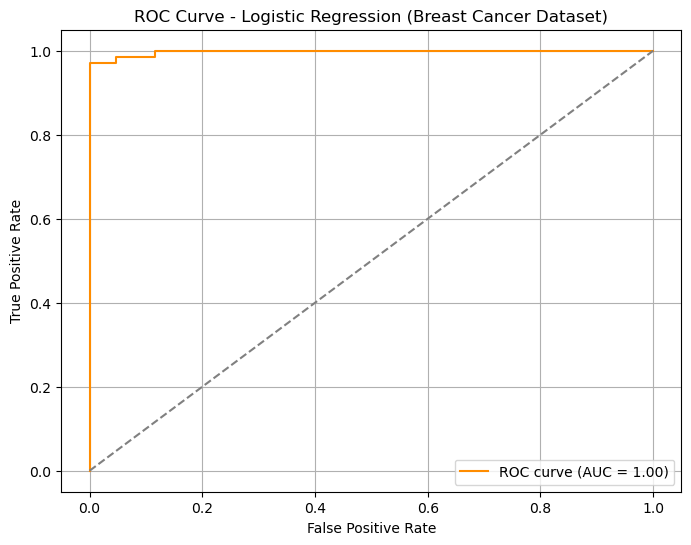

In [8]:
# Part-II: Logistic Regression 

# Task 5: Binary Classification with Logistic Regression 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:",f"{accuracy:.4f}\n")
print("Confusion Matrix:","\n",conf_matrix, "\n")
print("Classification Report (Precision, Recall, F1-Score):","\n",report)
print("ROC-AUC Score:",f"{roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Breast Cancer Dataset)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Threshold = 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.9655

Threshold = 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.9655

Threshold = 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1 Score: 0.9790


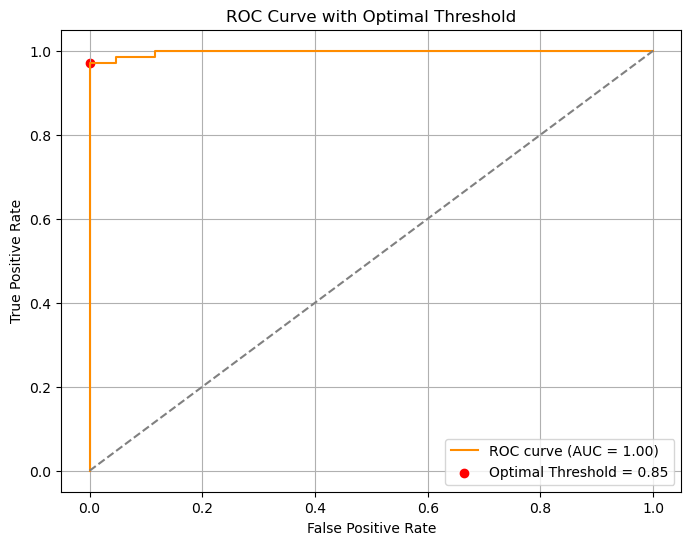


Optimal Threshold by Youden’s J: 0.85


In [13]:
# Task 6: Threshold Tuning and Probability Interpretation 

y_proba = model.predict_proba(X_test)[:, 1]  

def evaluate_threshold(threshold):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"\nThreshold = {threshold}")
    print("Confusion Matrix:")
    print(cm)
    print(f"F1 Score: {f1:.4f}")
    return y_pred_thresh

for t in [0.3, 0.5, 0.7]:
    evaluate_threshold(t)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nOptimal Threshold by Youden’s J: {optimal_threshold:.2f}")


In [16]:
# Task 7: Multiclass Classification (Optional) 

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Model Accuracy:",f"{accuracy:.4f}\n")
print("Classification Report:","\n",report)


Model Accuracy: 1.0000

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\katiy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
